Data Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat=loadmat("ex7data2.mat")
X=mat["X"]

Closest Centroids

In [3]:
def findClosestCentroids(X,centroids):
    K=centroids.shape[0]
    idx=np.zeros((X.shape[0],1))
    temp=np.zeros((centroids.shape[0],1))
    for i in range(X.shape[0]):
        for j in range(K):
            dist=X[i,:]-centroids[j,:]
            length=np.sum(dist**2)
            temp[j]=length
        idx[i]=np.argmin(temp)+1
    return idx

In [4]:
K=3
initial_centroids=np.array([[3,3],[6,2],[8,5]])
idx=findClosestCentroids(X,initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


Computing Centroid Means

In [5]:
def computeCentroids(X,idx,K):
    m,n=X.shape[0],X.shape[1]
    centroids=np.zeros((K,n))
    count=np.zeros((K,1))
    for i in range(m):
        index=int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    return centroids/count

In [6]:
centroids=computeCentroids(X,idx,K)
print("Centroids computed after initial finding of closest centroids:\n",centroids)


Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [7]:
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()

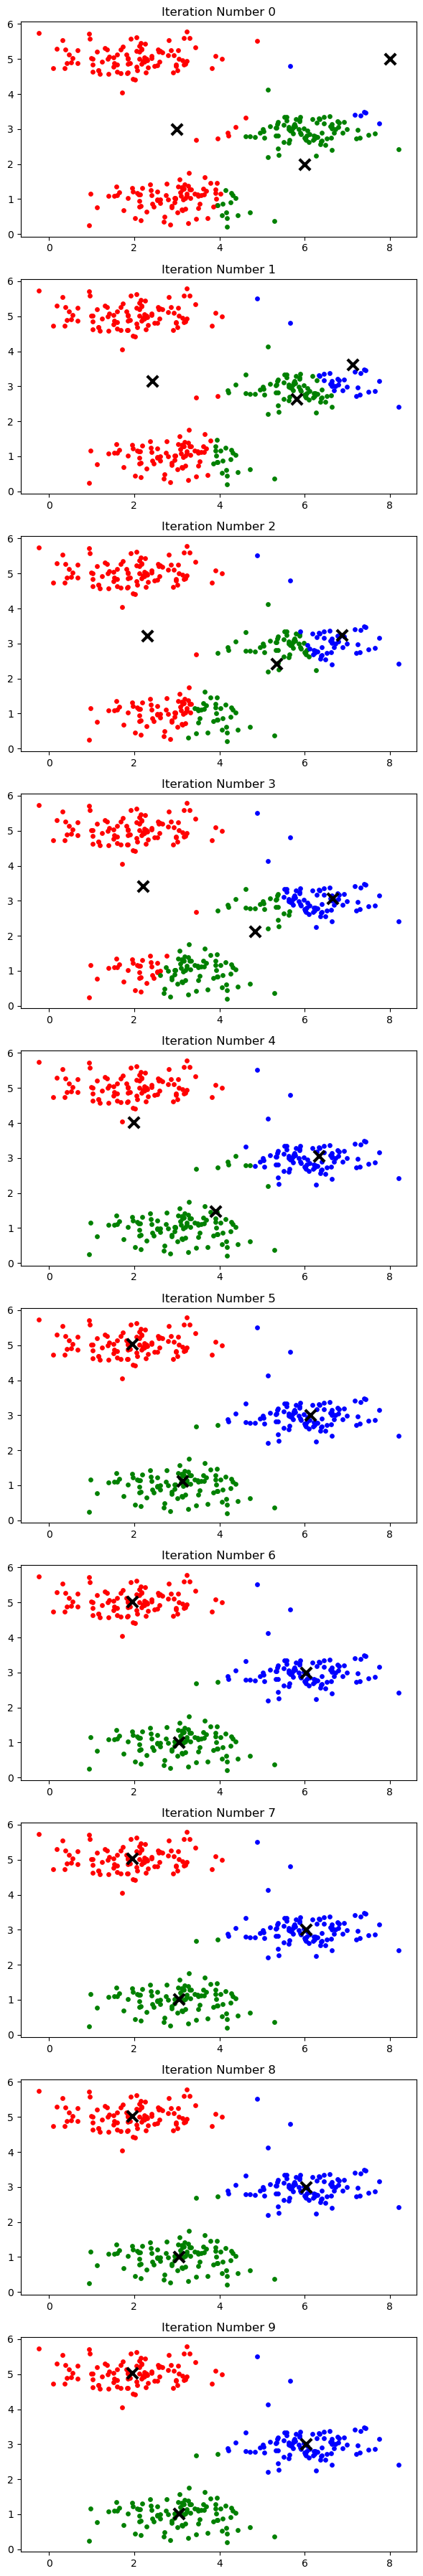

In [8]:
m,n=X.shape[0],X.shape[1]
plotKmeans(X,initial_centroids,idx,K,10)

Random Initialization

In [9]:
def kMeanInitCentroids(X,K):
    m,n=X.shape[0],X.shape[1]
    centroids=np.zeros((K,n))
    for i in range(K):
        centroids[i]=X[np.random.randint(0,m+1),:]
    return centroids

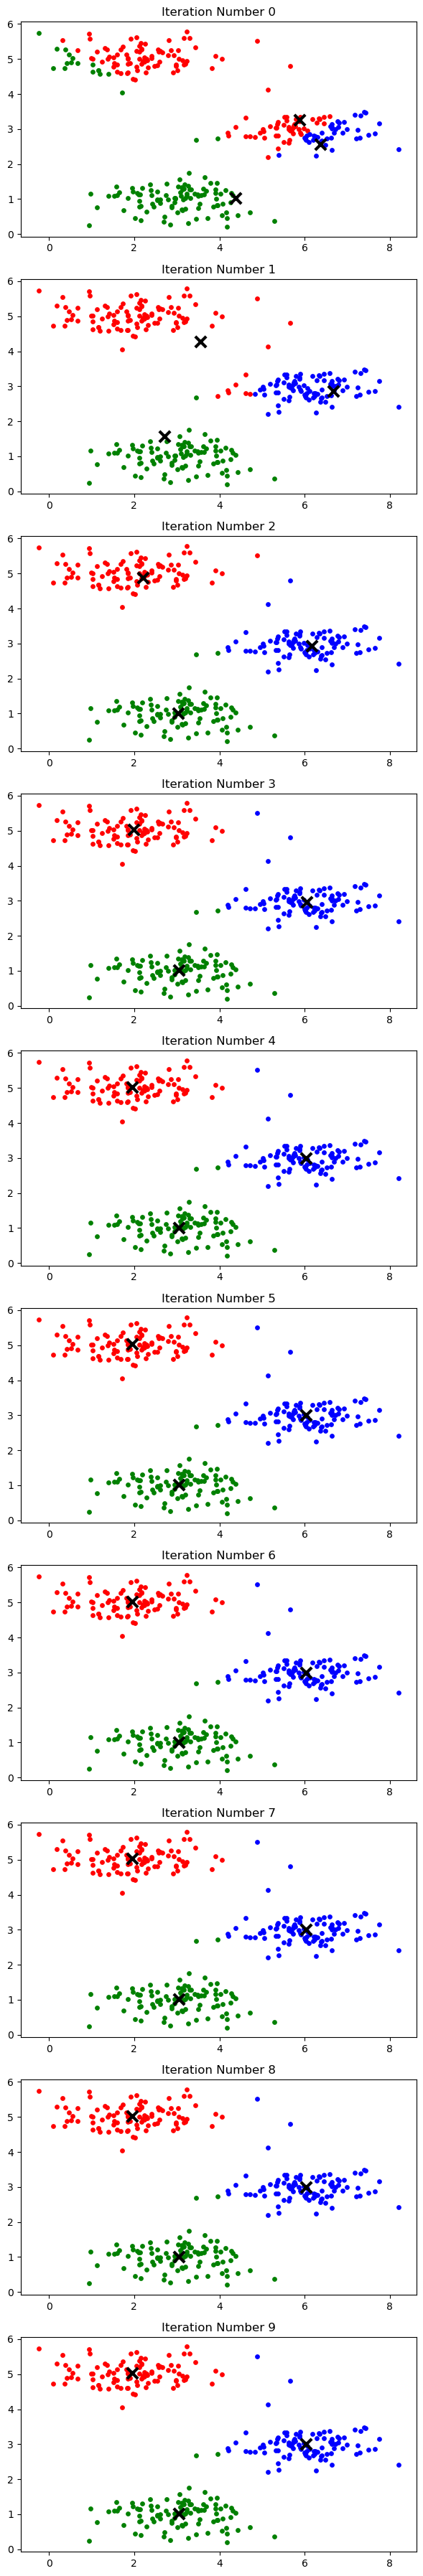

In [10]:
centroids=kMeanInitCentroids(X,K)
idx=findClosestCentroids(X,centroids)
plotKmeans(X,centroids,idx,K,10)

Image Compression with K-means

In [11]:
mat2=loadmat("bird_small.mat")
A=mat2["A"]
X2=(A/255).reshape(128*128,3)

In [12]:
def runKmeans(X,initial_centroids,num_iters,K):
    idx=findClosestCentroids(X,initial_centroids)
    for i in range(num_iters):
        centroids=computeCentroids(X,idx,K)
        idx=findClosestCentroids(X,initial_centroids)
    return centroids, idx

In [15]:
K2=16
num_iters=10
initial_centroids2=kMeanInitCentroids(X2,K2)
centroids2,idx2=runKmeans(X2,initial_centroids2,num_iters,K2)

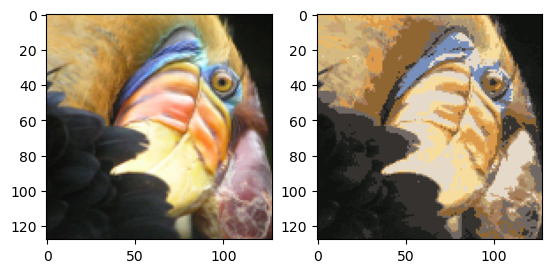

In [16]:
m2,n2=X.shape[0],X.shape[1]
X2_recovered=X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:]=centroids2[i-1]
X2_recovered=X2_recovered.reshape(128,128,3)
fig,ax=plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

Principal Component Analysis

In [18]:
mat3=loadmat("ex7data1.mat")
X3=mat3["X"]

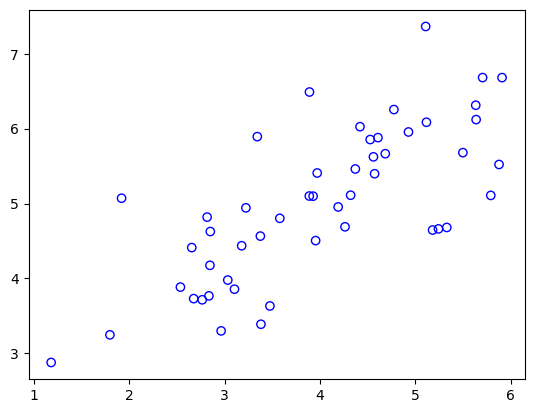

In [19]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

PCA Implementation

In [20]:
def featureNormalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [21]:
def pca(X):
    m,n=X.shape[0],X.shape[1]
    sigma=1/m*X.T@X
    U,S,V=svd(sigma)
    return U,S,V

In [22]:
from numpy .linalg import svd
X_norm,mu,std=featureNormalize(X3)
U,S=pca(X_norm)[:2]

(2.0, 8.0)

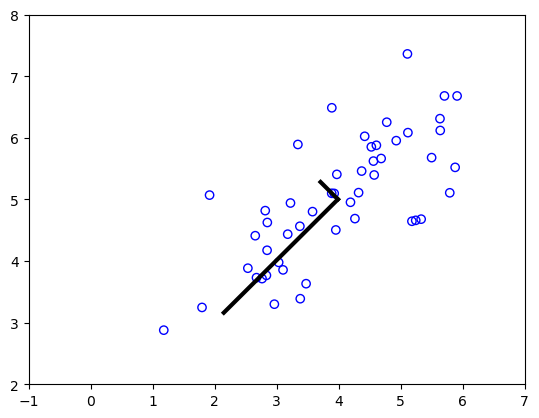

In [23]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [24]:
print("Top eigenvector U(:,1)=:",U[:,0])

Top eigenvector U(:,1)=: [-0.70710678 -0.70710678]


Dimensional Reduction with PCA

In [27]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [30]:
K=1
Z=projectData(X_norm,U,K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578517


Reconstructing an approximation of the data

In [31]:
def recoverData(Z,U,K):
    m,n=Z.shape[0],U.shape[0]
    X_rec=np.zeros((m,n))
    U_reduced=U[:,:K]
    for i in range(m):
        X_rec[i,:]=Z[i,:]@U_reduced.T
    return X_rec

In [32]:
X_rec=recoverData(Z,U,K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


Visualizing the Projections

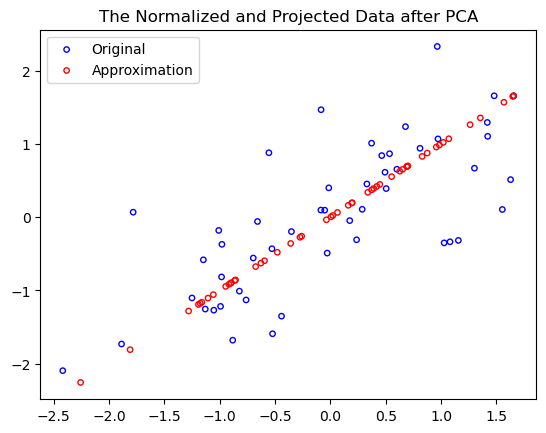

In [33]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

Face Image Dataset

In [34]:
mat4=loadmat("ex7faces.mat")
X4=mat4["X"]


Visualizing the Dataset

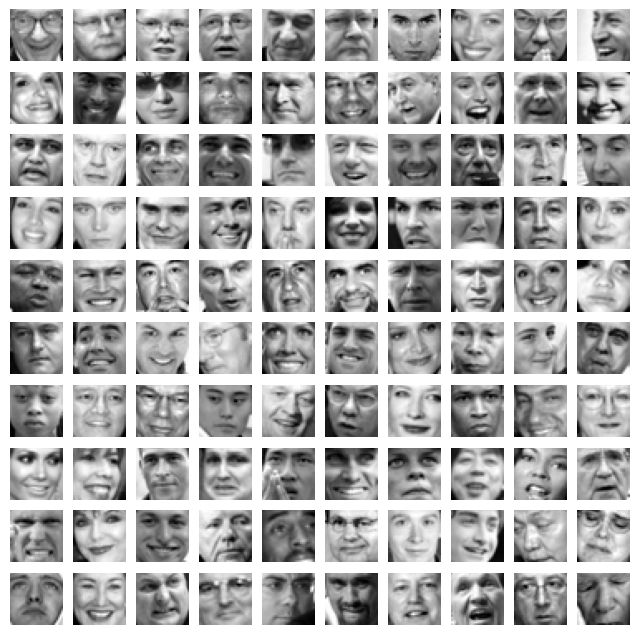

In [37]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")


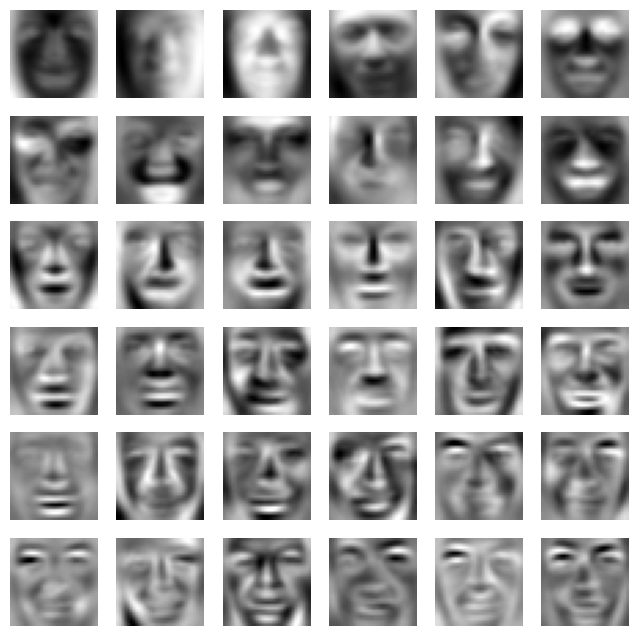

In [38]:
X_norm2 = featureNormalize(X4)[0]

# Run PCA
U2 =pca(X_norm2)[0]

#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [39]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


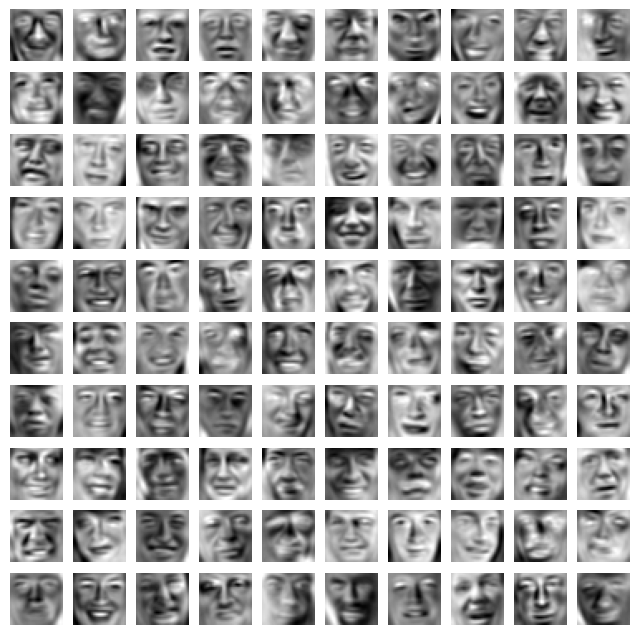

In [40]:
# Data reconstruction
X_rec2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")